Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.


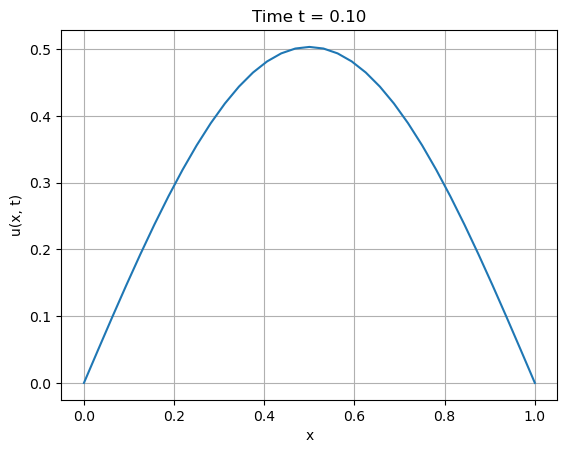

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.


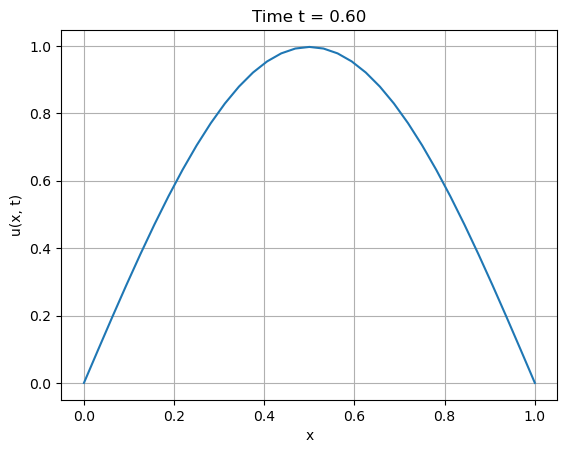

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.


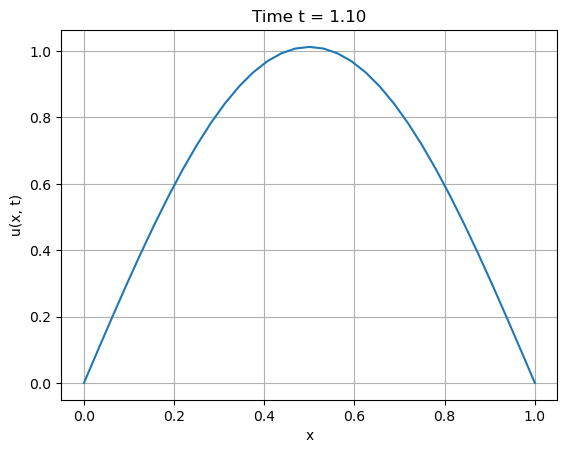

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.


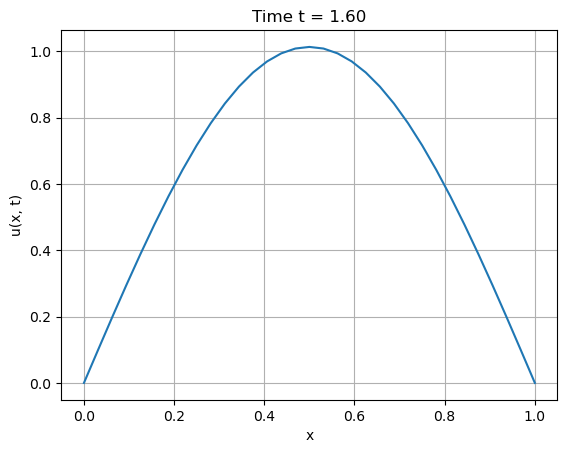

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.


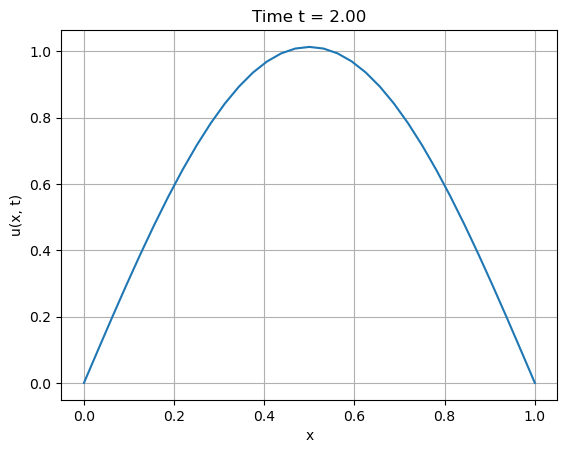

In [1]:
from fenics import *
import matplotlib.pyplot as plt
import numpy as np

# Create 1D mesh and define function space
nx = 32
mesh = UnitIntervalMesh(nx)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition u = 0 on both ends
u_D = Constant(0.0)
bc = DirichletBC(V, u_D, 'on_boundary')

# Define initial condition u0(x) = 0
u_n = interpolate(Constant(0.0), V)

# Define time step and final time
dt = 0.1
T = 2.0
num_steps = int(T / dt)

# Define variational problem for one time step
u = TrialFunction(V)
v = TestFunction(V)

f = Expression('10*sin(pi*x[0])', degree=2)

a = u*v*dx + dt*dot(grad(u), grad(v))*dx
L = (u_n + dt*f)*v*dx

u = Function(V)

# Time-stepping loop
for n in range(num_steps):
    t = (n+1)*dt

    # Update source if time-dependent (optional)
    f.t = t

    # Solve the linear system
    solve(a == L, u, bc)

    # Update previous solution
    u_n.assign(u)

    # Plot every few steps
    if n % 5 == 0 or n == num_steps - 1:
        plot(u)
        plt.title(f'Time t = {t:.2f}')
        plt.xlabel('x')
        plt.ylabel('u(x, t)')
        plt.grid(True)
        plt.show()
